# Classification Project

In [1]:
# import libraries
import pandas as pd
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np
import datetime as dt

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
import math

import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import make_scorer, accuracy_score #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

### Data Cleaning

In [84]:
df = pd.read_csv('telecom.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [85]:
df['international plan'] = np.where(df['international plan'] == 'no', 0, 1)
df['voice mail plan'] = np.where(df['voice mail plan'] == 'no', 0, 1)
df.churn = np.where(df['churn'] == False, 0, 1)
df.rename(columns = {'account length': 'Acc_len_days', 'area code':'area_c'}, inplace = True)
df.drop('phone number', axis=1, inplace = True)

In [86]:
df1 = df

### EDA

In [5]:
df.isnull().sum()

state                     0
Acc_len_days              0
area_c                    0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
df.groupby('state').churn.mean()

state
AK    0.057692
AL    0.100000
AR    0.200000
AZ    0.062500
CA    0.264706
CO    0.136364
CT    0.162162
DC    0.092593
DE    0.147541
FL    0.126984
GA    0.148148
HI    0.056604
IA    0.068182
ID    0.123288
IL    0.086207
IN    0.126761
KS    0.185714
KY    0.135593
LA    0.078431
MA    0.169231
MD    0.242857
ME    0.209677
MI    0.219178
MN    0.178571
MO    0.111111
MS    0.215385
MT    0.205882
NC    0.161765
ND    0.096774
NE    0.081967
NH    0.160714
NJ    0.264706
NM    0.096774
NV    0.212121
NY    0.180723
OH    0.128205
OK    0.147541
OR    0.141026
PA    0.177778
RI    0.092308
SC    0.233333
SD    0.133333
TN    0.094340
TX    0.250000
UT    0.138889
VA    0.064935
VT    0.109589
WA    0.212121
WI    0.089744
WV    0.094340
WY    0.116883
Name: churn, dtype: float64

In [7]:
df['total day calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total day calls, dtype: float64

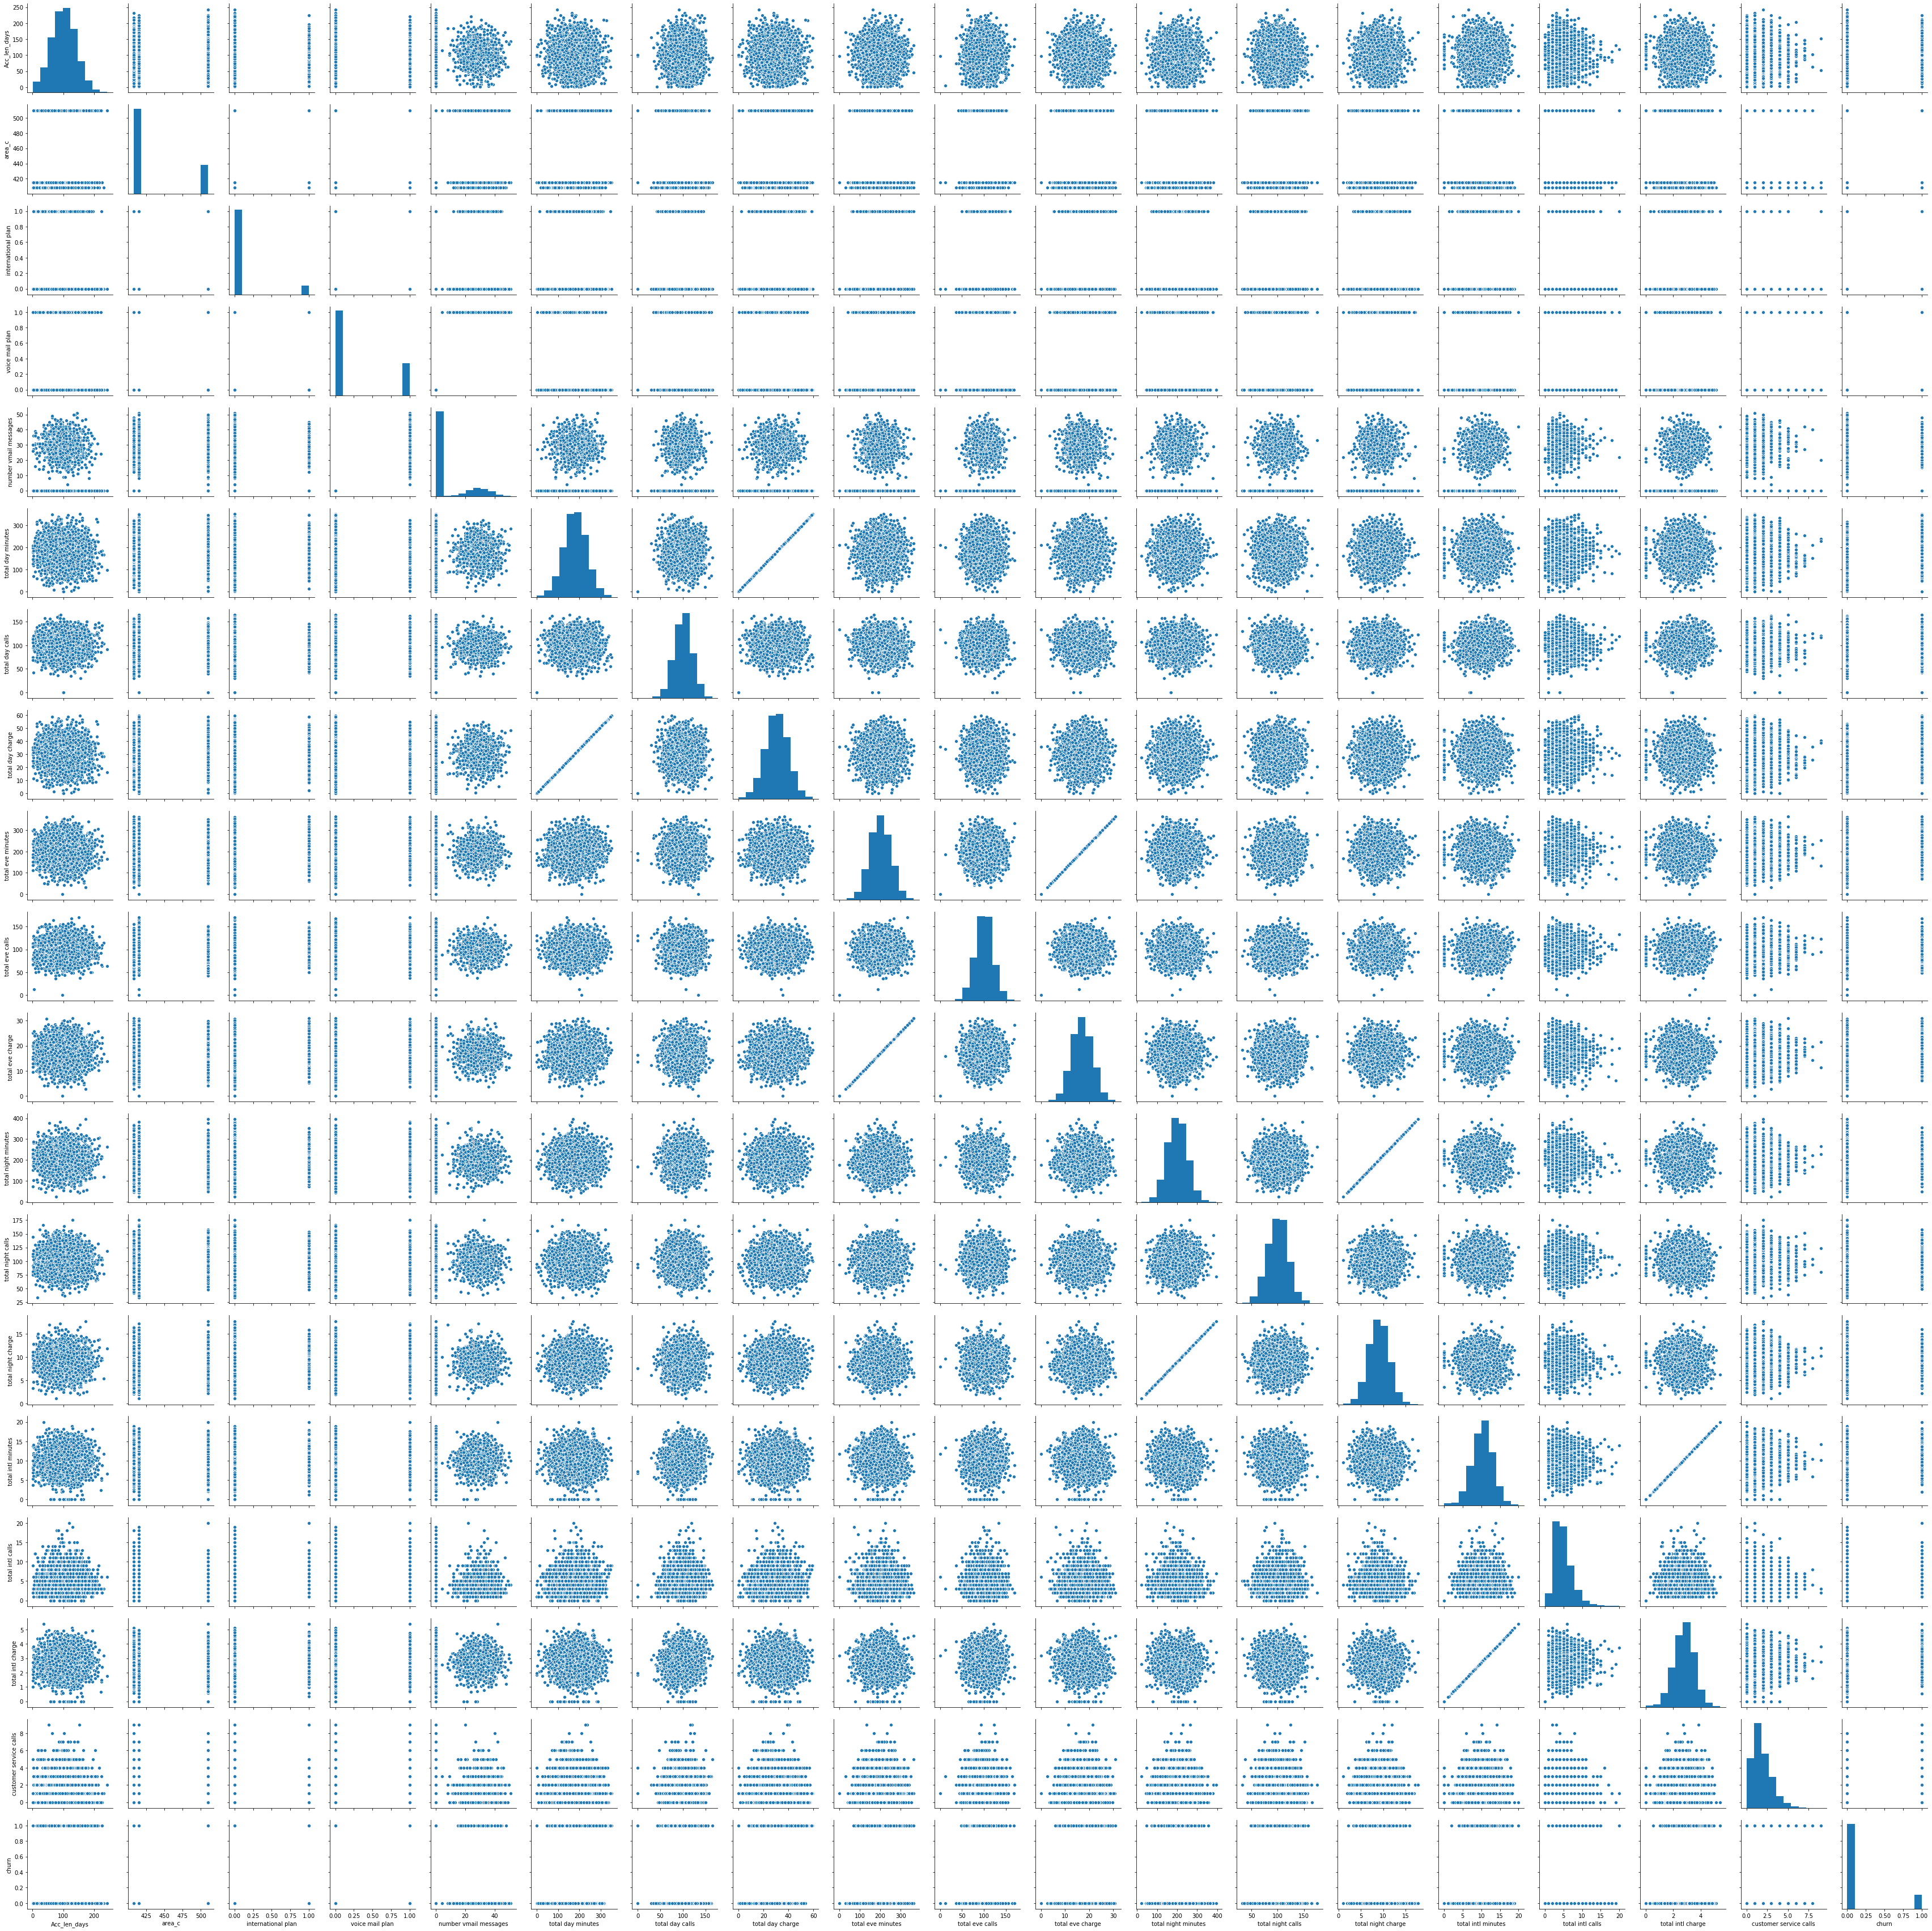

In [8]:
sns.pairplot(df)

In [9]:
df.columns

Index(['state', 'Acc_len_days', 'area_c', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

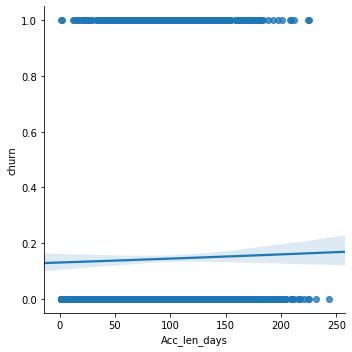

In [10]:
sns.lmplot(x = 'Acc_len_days', y = 'churn', data = df, logistic = True)

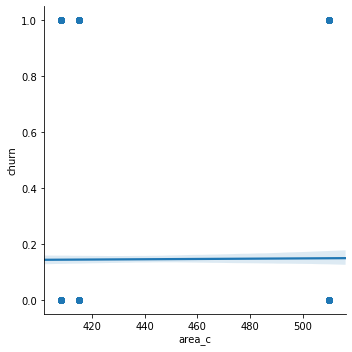

In [11]:
sns.lmplot(x = 'area_c', y = 'churn', data = df, logistic = True)

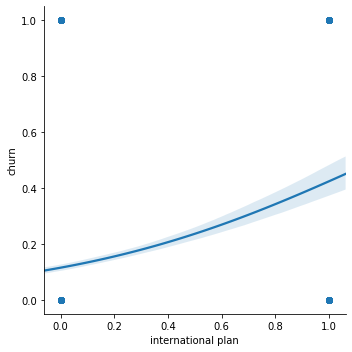

In [12]:
sns.lmplot(x = 'international plan', y = 'churn', data = df, logistic = True)

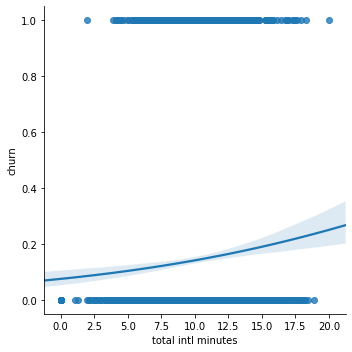

In [13]:
sns.lmplot(x = 'total intl minutes', y = 'churn', data = df, logistic = True)

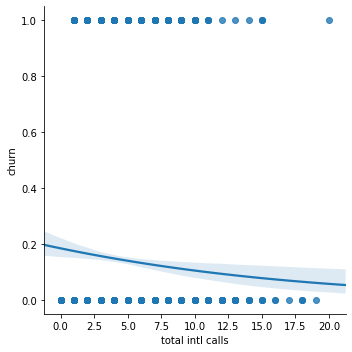

In [14]:
sns.lmplot(x = 'total intl calls', y = 'churn', data = df, logistic = True)

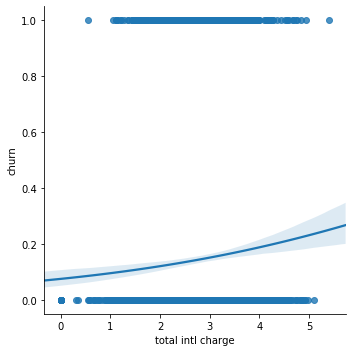

In [15]:
sns.lmplot(x = 'total intl charge', y = 'churn', data = df, logistic = True)

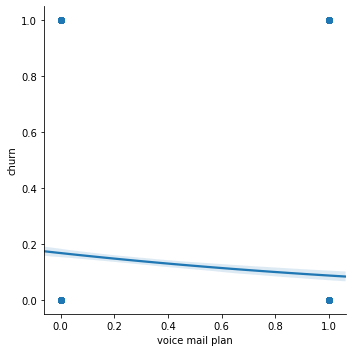

In [16]:
sns.lmplot(x = 'voice mail plan', y = 'churn', data = df, logistic = True)

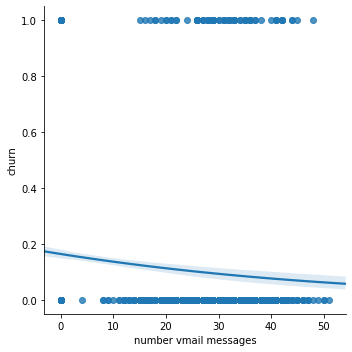

In [17]:
sns.lmplot(x = 'number vmail messages', y = 'churn', data = df, logistic = True)

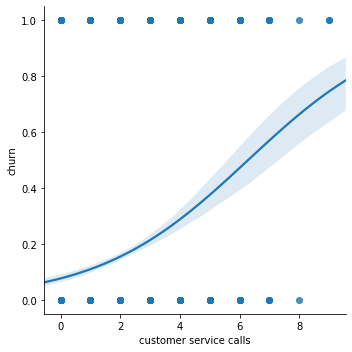

In [18]:
sns.lmplot(x = 'customer service calls', y = 'churn', data = df, logistic = True)

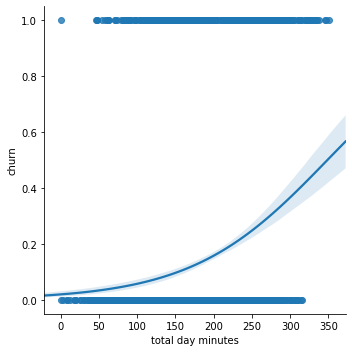

In [19]:
sns.lmplot(x = 'total day minutes', y = 'churn', data = df, logistic = True)

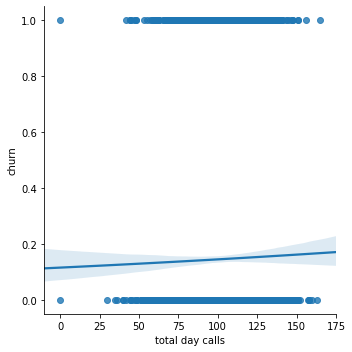

In [20]:
sns.lmplot(x = 'total day calls', y = 'churn', data = df, logistic = True)

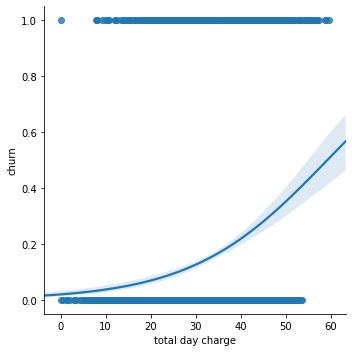

In [21]:
sns.lmplot(x = 'total day charge', y = 'churn', data = df, logistic = True)

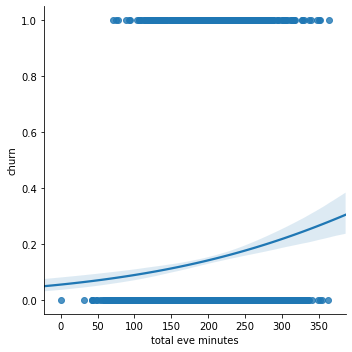

In [22]:
sns.lmplot(x = 'total eve minutes', y = 'churn', data = df, logistic = True)

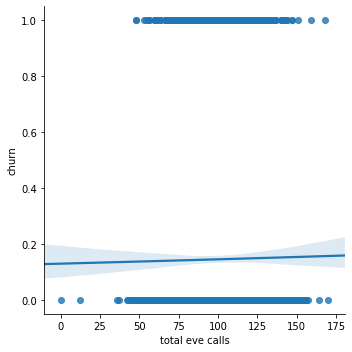

In [23]:
sns.lmplot(x = 'total eve calls', y = 'churn', data = df, logistic = True)

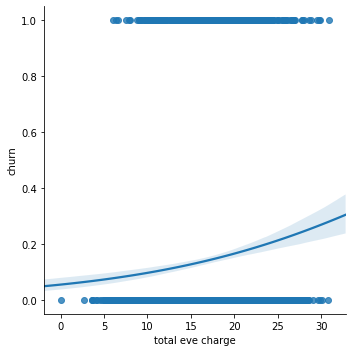

In [24]:
sns.lmplot(x = 'total eve charge', y = 'churn', data = df, logistic = True)

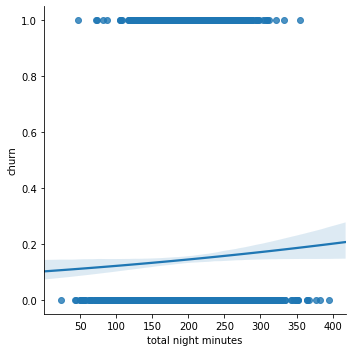

In [25]:
sns.lmplot(x = 'total night minutes', y = 'churn', data = df, logistic = True)

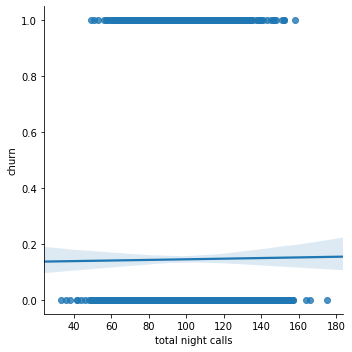

In [26]:
sns.lmplot(x = 'total night calls', y = 'churn', data = df, logistic = True)

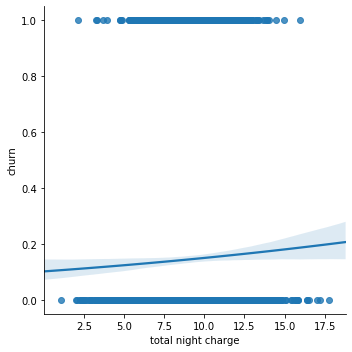

In [27]:
sns.lmplot(x = 'total night charge', y = 'churn', data = df, logistic = True)

In [28]:
df['total_minutes'] = df['total night minutes'] + df['total day minutes'] + df['total eve minutes']

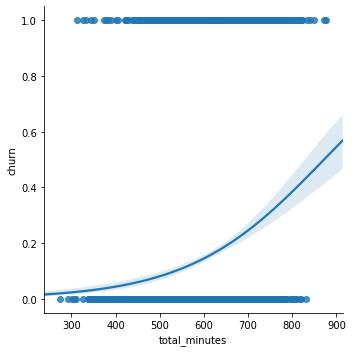

In [29]:
sns.lmplot(x = 'total_minutes', y = 'churn', data = df, logistic = True)

In [30]:
df['min_per_day'] = df['total_minutes']/df['Acc_len_days']

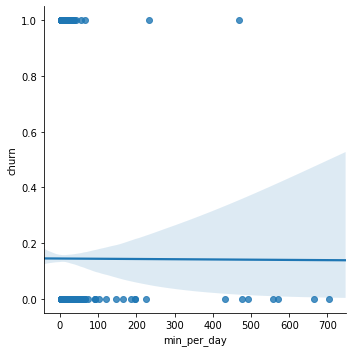

In [33]:
sns.lmplot(x = 'min_per_day', y = 'churn', data = df, logistic = True)

In [35]:
df['total_calls']= df['total night calls'] + df['total day calls'] + df['total eve calls']

In [36]:
df['min_per_call'] = df['total_minutes']/df['total_calls']

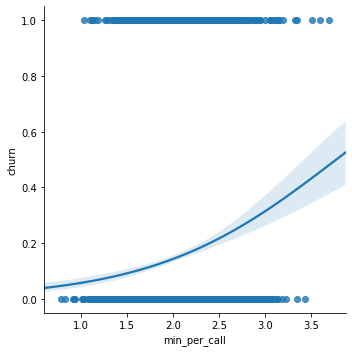

In [37]:
sns.lmplot(x = 'min_per_call', y = 'churn', data = df, logistic = True)

In [96]:
df['cs_length'] = df['customer service calls']/df['Acc_len_days']

In [98]:
df.head()

state  Acc_len_days  area_c  international plan  voice mail plan  \
0    KS           128     415                   0                1   
1    OH           107     415                   0                1   
2    NJ           137     415                   0                0   
3    OH            84     408                   1                0   
4    OK            75     415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  ...  total eve charge  \
0             45.07              197.4  ...             16.78   
1             27.47              195.5  ...             16.62   
2             41.38              121.2  ...             10.30   
3             50.90               61.9  ...              5.26   
4             28.34              148.3  ...             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  cs_length  
0                       1      0   0.007812  
1                       1      0   0.009346  
2                       0      0   0.000000  
3                       2      0   0.023810  
4                       3      0   0.040000  

[5 rows x 21 columns]

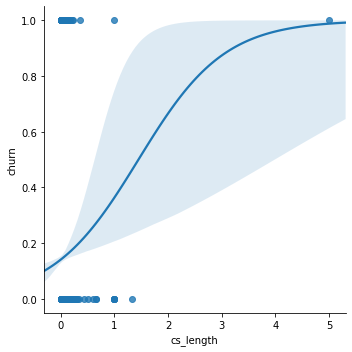

In [97]:
sns.lmplot(x = 'cs_length', y = 'churn', data = df, logistic = True)

### Feature Engineering

In [87]:
state = pd.get_dummies(df1['state'], prefix='state')
df1 = pd.concat([df1, state], axis=1)

In [88]:
target = df1.churn

df1.drop(['churn', 'state'], axis = 1, inplace = True)

### Modeling

#### Xgboost

In [89]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.075)
clf.fit(df1, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.075, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=10, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size=0.20, random_state=23)

In [91]:
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.965517
F1: 0.868571


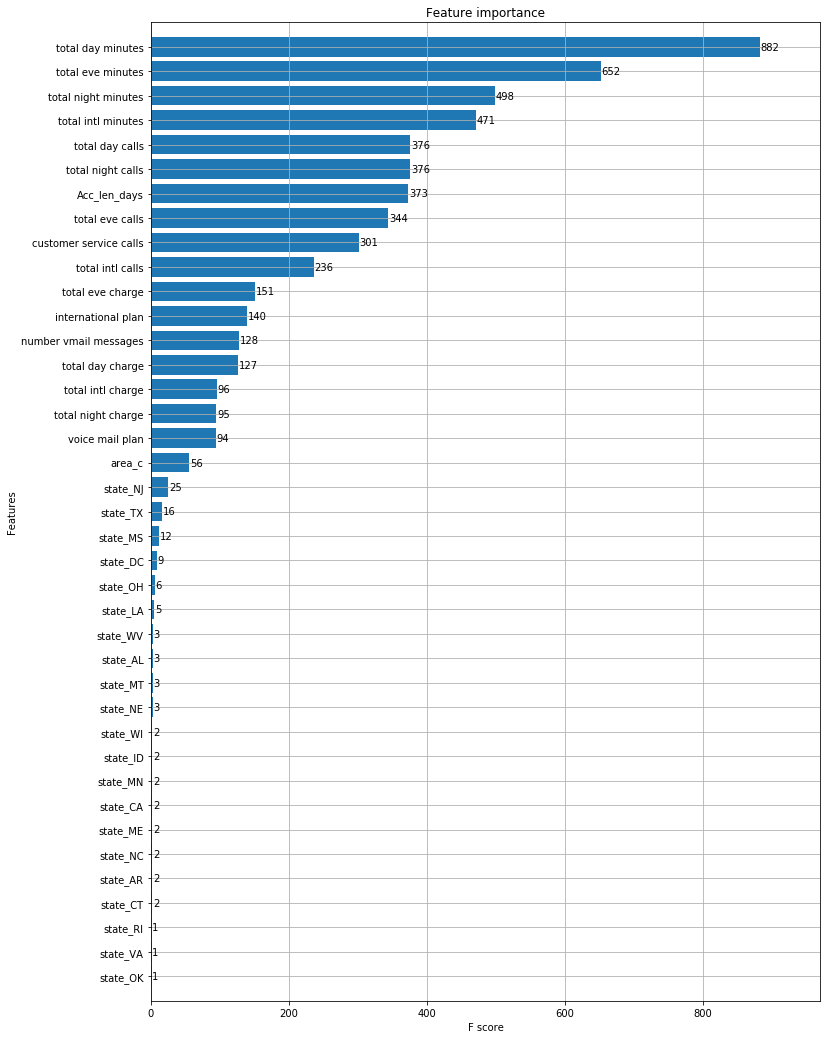

In [47]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

##### Class Imbalance

In [49]:
training  = pd.concat([X_train, y_train], axis=1)
churn0 = training[training.churn==0]
churn1 = training[training.churn==1]
print(len(churn0))
print(len(churn1))

2278
388


In [50]:
churned_upsampled = resample(churn1 ,replace=True, n_samples=len(churn0), random_state=23)
upsampled = pd.concat([churn0, churned_upsampled])


In [51]:
y_train = upsampled.churn
X_train = upsampled.drop('churn', axis=1)

In [52]:
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

In [53]:
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.962519
F1: 0.863388


#### DecisionTreeClassifier

In [54]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
preds = dtc.predict(X_test)
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.914543
F1: 0.716418


#### Random Forest

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.919040
F1: 0.658228


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Gradient Boosting Classifier

In [56]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
preds = gbc.predict(X_test)
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.937031
F1: 0.798077


#### Logistic Regression

In [57]:
lg = LogisticRegression(C=1e12, solver ='liblinear')
lg.fit(X_train, y_train)
preds = lg.predict(X_test)
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.761619
F1: 0.498423


### Feature Engineering Part 2

Dropping Muticollinearity

In [58]:
df2 = df1

In [59]:
df2.drop(['total eve charge', 'total day charge', 'total intl charge', 'total night charge'], axis =1, inplace = True )

In [60]:
df2.head()

Acc_len_days  area_c  international plan  voice mail plan  \
0           128     415                   0                1   
1           107     415                   0                1   
2           137     415                   0                0   
3            84     408                   1                0   
4            75     415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total eve minutes  total eve calls  total night minutes  ...  state_SD  \
0              197.4               99                244.7  ...         0   
1              195.5              103                254.4  ...         0   
2              121.2              110                162.6  ...         0   
3               61.9               88                196.9  ...         0   
4              148.3              122                186.9  ...         0   

   state_TN  state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_WV  state_WY  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 65 columns]

### Modeling Part 2

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.20, random_state=23)

#### Gradient Boosting Classifier

In [62]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
preds = gbc.predict(X_test)
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.947526
F1: 0.800000


#### Logistic Regression

In [63]:
lg = LogisticRegression(C=1e12, solver ='liblinear')
lg.fit(X_train, y_train)
preds = lg.predict(X_test)
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.863568
F1: 0.283465


Class imbalance

In [64]:
training  = pd.concat([X_train, y_train], axis=1)
churn0 = training[training.churn==0]
churn1 = training[training.churn==1]
print(len(churn0))
print(len(churn1))
churned_upsampled = resample(churn1 ,replace=True, n_samples=len(churn0), random_state=23)
upsampled = pd.concat([churn0, churned_upsampled])
upsampled.churn.value_counts()

2278
388


1    2278
0    2278
Name: churn, dtype: int64

In [65]:
y_train = upsampled.churn
X_train = upsampled.drop('churn', axis=1)

In [66]:
lg = LogisticRegression(C=1e12, solver ='liblinear')
lg.fit(X_train, y_train)
preds = lg.predict(X_test)
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.761619
F1: 0.498423


In [67]:
df2.columns

Index(['Acc_len_days', 'area_c', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype=

##### Feature Engineering Part  3

In [68]:
df2.drop(['total day calls', 'total eve calls', 'total night calls', 'total intl calls'], axis =1, inplace =True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.20, random_state=23)
training  = pd.concat([X_train, y_train], axis=1)
churn0 = training[training.churn==0]
churn1 = training[training.churn==1]
print(len(churn0))
print(len(churn1))
churned_upsampled = resample(churn1 ,replace=True, n_samples=len(churn0), random_state=23)
upsampled = pd.concat([churn0, churned_upsampled])
upsampled.churn.value_counts()

2278
388


1    2278
0    2278
Name: churn, dtype: int64

In [70]:
y_train = upsampled.churn
X_train = upsampled.drop('churn', axis=1)

In [71]:
lg = LogisticRegression(C=1e12, solver ='liblinear')
lg.fit(X_train, y_train)
preds = lg.predict(X_test)
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.751124
F1: 0.481250


In [72]:
df3 = df2

In [73]:
df3['total_minutes'] = df3['total day minutes'] + df3['total night minutes'] + df3['total eve minutes']

In [74]:
df3.drop(['total day minutes','total night minutes','total eve minutes'], axis = 1, inplace = True)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df3, target, test_size=0.20, random_state=23)
training  = pd.concat([X_train, y_train], axis=1)
churn0 = training[training.churn==0]
churn1 = training[training.churn==1]
print(len(churn0))
print(len(churn1))
churned_upsampled = resample(churn1 ,replace=True, n_samples=len(churn0), random_state=23)
upsampled = pd.concat([churn0, churned_upsampled])
upsampled.churn.value_counts()

2278
388


1    2278
0    2278
Name: churn, dtype: int64

In [76]:
y_train = upsampled.churn
X_train = upsampled.drop('churn', axis=1)
lg = LogisticRegression(penalty = 'l1', C=1e12, solver ='liblinear')
lg.fit(X_train, y_train)
preds = lg.predict(X_test)
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.751124
F1: 0.467949


In [77]:
y_train = upsampled.churn
X_train = upsampled.drop('churn', axis=1)
lg = LogisticRegression(penalty = 'l2', C=1e12, solver ='liblinear')
lg.fit(X_train, y_train)
preds = lg.predict(X_test)
test_f = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f))

Accuracy: 0.751124
F1: 0.467949


### Confusion Matrix For Xgboost model( be careful)

In [92]:
cf = confusion_matrix(y_test,preds)
cf

array([[568,   4],
       [ 19,  76]])

In [93]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[568   4]
 [ 19  76]]


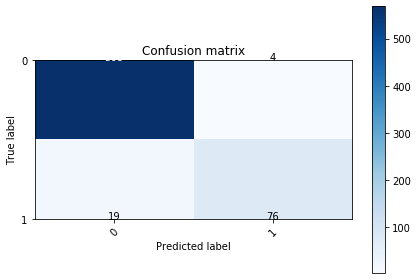

In [95]:
import itertools
classes = ['0', '1']
plot_confusion_matrix(cf, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)